# Imports

In [0]:
import pandas as pd 
import numpy as np
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [0]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [0]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4.0,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [0]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [0]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [0]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [0]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [0]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [0]:
# creating a blank series 
surface_list = pd.Series([]) 
orientation_list = pd.Series([]) 
form_list = pd.Series([]) 
dexterity_list = pd.Series([]) 
rating_list = pd.Series([]) 

df_postures_stats = pd.melt(df_postures, id_vars=['ParticipantID'], var_name='posture', value_name='score')

for i in range(len(df_postures_stats)): 
  independent_variable = df_postures_stats["posture"][i].split("_")
  rating_list[i] = independent_variable[0]
  surface_list[i] = independent_variable[1]
  dexterity_list[i] = independent_variable[2]
  form_list[i] = independent_variable[3]
  orientation_list[i] = independent_variable[4]

  
df_postures_stats.insert(3, "surface", surface_list)
df_postures_stats.insert(4, "dexterity", dexterity_list)
df_postures_stats.insert(5, "form", form_list)
df_postures_stats.insert(6, "orientation", orientation_list)
df_postures_stats.insert(7, "rating", rating_list)
df_postures_stats["posture"] = df_postures_stats["posture"].map(lambda x: x.lstrip('Comfort_').lstrip('Preference_')) #[i.replace("Comfort_|Preference_","") for i in df_postures_stats["posture"]]
print(df_postures_stats.head())


   ParticipantID            posture  score  ...  form orientation   rating
0  participant_1  Below_Left_Fist_0    3.0  ...  Fist           0  Comfort
1  participant_2  Below_Left_Fist_0    4.0  ...  Fist           0  Comfort
2  participant_3  Below_Left_Fist_0    4.0  ...  Fist           0  Comfort
3  participant_4  Below_Left_Fist_0    4.0  ...  Fist           0  Comfort
4  participant_5  Below_Left_Fist_0    2.0  ...  Fist           0  Comfort

[5 rows x 8 columns]


In [0]:
df_postures_stats_melted = pd.melt(df_postures_stats,id_vars=["ParticipantID","surface","score","orientation","dexterity","form", "rating"]).groupby("value").apply(lambda x: (x.sort_values('score', ascending=False)))
print(df_postures_stats_melted.head())
# print(df_orientation_postures_stats.head())
# print(df_handform_postures_stats.head())
# print(df_dexterity_postures_stats.head())


                       ParticipantID surface  ...  variable              value
value                                         ...                             
Below_Left_Fist_0 20  participant_21   Below  ...   posture  Below_Left_Fist_0
                  12  participant_13   Below  ...   posture  Below_Left_Fist_0
                  42  participant_13   Below  ...   posture  Below_Left_Fist_0
                  35   participant_6   Below  ...   posture  Below_Left_Fist_0
                  45  participant_16   Below  ...   posture  Below_Left_Fist_0

[5 rows x 9 columns]


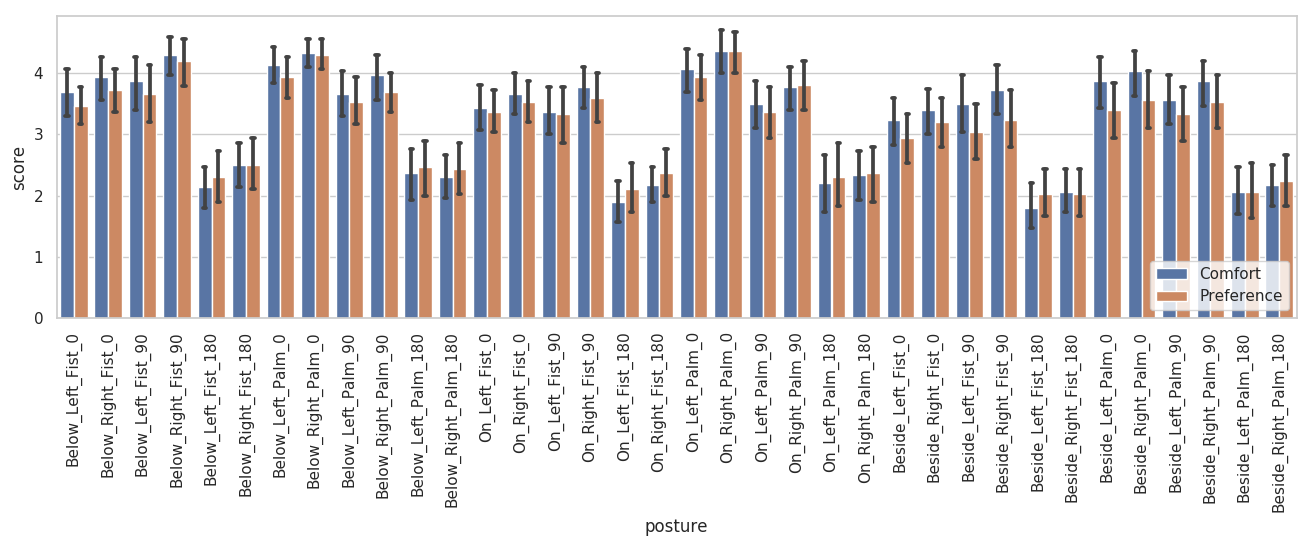

In [0]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="posture", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')

comfort 
             score
surface          
Below    3.433333
Beside   3.108333
On       3.211111
-----
preference 
             score
surface          
Below    3.352778
Beside   2.883008
On       3.202778


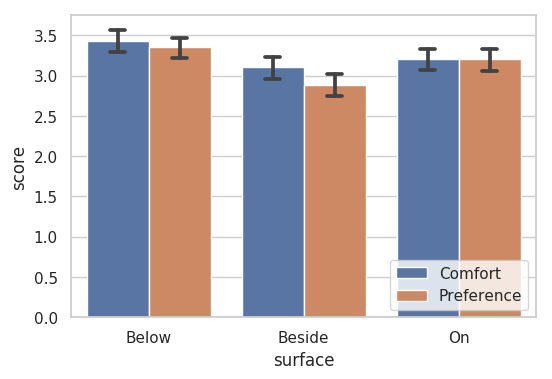

In [100]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats_melted, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Comfort"].groupby("surface").mean())
print("-----")
print("preference \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Preference"].groupby("surface").mean())

comfort 
                 score
orientation          
0            3.847222
180          2.166667
90           3.738889
-----
preference 
                 score
orientation          
0            3.644444
180          2.266667
90           3.529248


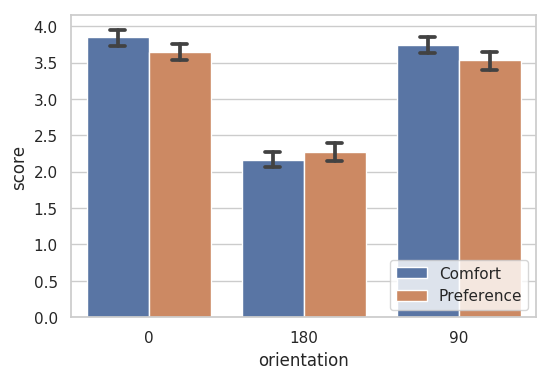

In [99]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats_melted, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Comfort"].groupby("orientation").mean())
print("-----")
print("preference \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Preference"].groupby("orientation").mean())

comfort 
               score
dexterity          
Left       3.131481
Right      3.370370
-----
preference 
               score
dexterity          
Left       3.031481
Right      3.261596


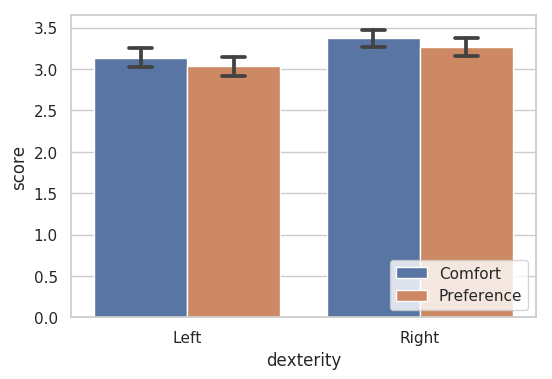

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats_melted, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Comfort"].groupby("dexterity").mean())
print("-----")
print("preference \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Preference"].groupby("dexterity").mean())

comfort 
          score
form          
Fist  3.137037
Palm  3.364815
-----
preference 
          score
form          
Fist  3.035250
Palm  3.257407


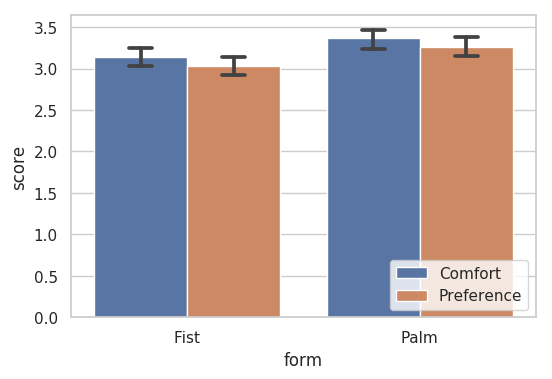

In [97]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats_melted, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Comfort"].groupby("form").mean())
print("-----")
print("preference \n", df_postures_stats_melted.loc[df_postures_stats_melted["rating"]=="Preference"].groupby("form").mean())

**To do**

- ~Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)~
- Give design recomendations based on above^^